# Boise Economic Impact of Air Quality: Analysis and Prediction

This project investigates the relationship between air quality and economic performance in Boise, Idaho, focusing on how wildfires, air quality index (AQI), and key economic factors such as GDP, unemployment rates, and Micron Technology’s stock prices interact. The analysis includes correlation analysis, predictive modeling, and forecasting of Boise’s economic future based on these relationships.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the dataset containing the distances of wildfires from Boise.
distance_df = pd.read_csv('/content/drive/MyDrive/DATA 512/Project/intermediate/distance_final.csv')

# Load the Air Quality Index (AQI) data from the EPA.
aqi_df = pd.read_csv('/content/drive/MyDrive/DATA 512/Project/intermediate/epa_air_quality_api_response_final.csv')

# Load the unemployment rate data for Boise from 1990 to the present.
unemployment_df = pd.read_csv('/content/drive/MyDrive/DATA 512/Project/data/Boise_unemployment_rate_1990.csv')

# Load the Micron Technology stock price data.
micron_stock_df = pd.read_csv('/content/drive/MyDrive/DATA 512/Project/data/micron_close_prices.csv')

# Load the Boise GDP data from the 'Boise_GDP.csv' file.
boise_gdp_df = pd.read_csv('/content/drive/MyDrive/DATA 512/Project/data/Boise_GDP.csv')

,year,name,size_acres,type,average_distance_miles
0,1961,BIG ANTELOPE (5),55249.740141,Wildfire,374.487188
1,1961,HARLOW (5),43920.841077,Wildfire,472.964683
2,1961,RANCHERIA (5),34233.698603,Wildfire,428.552399
3,1961,BOLLINGER RIDGE (5),32866.053451,Wildfire,519.241975
4,1961,Ditch Creek (3),27269.045936,Wildfire,179.483684


The section processes air quality data to calculate and clean the average yearly AQI during the fire season, providing a yearly overview of air quality trends.

In [ ]:
# Convert 'date_local' column to Pandas datetime objects
aqi_df['date_local'] = pd.to_datetime(aqi_df['date_local'])

# Extract year and month from the 'date_local' column
aqi_df['year'] = aqi_df['date_local'].dt.year
aqi_df['month'] = aqi_df['date_local'].dt.month

# Group by date, month, year, and site number to find the maximum AQI per station per day
daily_max_aqi = aqi_df.groupby(
    ['date_local', 'month', 'year', 'site_number'])['aqi'].max().reset_index()

# Group by date, month, and year to calculate the average AQI per day
daily_avg_aqi = daily_max_aqi.groupby(
    ['date_local', 'month', 'year'])['aqi'].mean().reset_index()

# Group by year to calculate the average AQI during the fire season for each year
yearly_avg_aqi = daily_avg_aqi.groupby('year')['aqi'].mean().reset_index()

# Remove rows with NaN values in the 'aqi' column
yearly_avg_aqi = yearly_avg_aqi[~np.isnan(yearly_avg_aqi['aqi'])]

# Convert the 'year' column to integers
yearly_avg_aqi['year'] = yearly_avg_aqi['year'].astype(int)
yearly_avg_aqi

,year,aqi
1,1975,47.554217
2,1976,70.576087
3,1977,46.961111
4,1978,44.377717
5,1979,52.032609
6,1980,46.652174
7,1981,31.479651
8,1982,45.464481
9,1983,49.657658
10,1984,29.570652


In [ ]:
monthly_avg_aqi = daily_avg_aqi.groupby(['year','month'])['aqi'].mean().reset_index()
monthly_avg_aqi = monthly_avg_aqi.dropna(subset=['aqi']) # Filter out rows with NaN in 'aqi' column
monthly_avg_aqi

,year,month,aqi
6,1975,8,56.903226
7,1975,9,49.307692
8,1975,10,34.653846
9,1976,5,62.451613
10,1976,6,61.200000
...,...,...,...
294,2023,9,36.155556
295,2023,10,34.435484
296,2024,5,34.688172
297,2024,6,41.244444


This code adjusts pandas' display options to show all rows and columns of the micron_stock_df dataframe without truncation, providing a complete view of the dataset. Afterward, the display settings are reset to their default values to avoid excessive output in future dataframes.

In [ ]:
# Display all records without truncation
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(micron_stock_df)
# Reset the options if you want to revert to default display settings
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

           date  stock_price
0    2024-11-01       102.64
1    2024-10-01        99.54
2    2024-09-01       103.59
3    2024-08-01        96.13
4    2024-07-01       109.60
5    2024-06-01       131.27
6    2024-05-01       124.75
7    2024-04-01       112.73
8    2024-03-01       117.54
9    2024-02-01        90.34
10   2024-01-01        85.50
11   2023-12-01        84.97
12   2023-11-01        75.79
13   2023-10-01        66.47
14   2023-09-01        67.63
15   2023-08-01        69.52
16   2023-07-01        70.83
17   2023-06-01        62.62
18   2023-05-01        67.67
19   2023-04-01        63.73
20   2023-03-01        59.75
21   2023-02-01        57.25
22   2023-01-01        59.71
23   2022-12-01        49.38
24   2022-11-01        56.95
25   2022-10-01        53.33
26   2022-09-01        49.39
27   2022-08-01        55.73
28   2022-07-01        60.87
29   2022-06-01        54.39
30   2022-05-01        72.65
31   2022-04-01        67.00
32   2022-03-01        76.53
33   2022-02-0

This code converts the 'year' and 'month' columns in monthly_avg_aqi, the 'DATE' column in unemployment_df, and the 'date' column in micron_stock_df to datetime format for consistent time-based analysis.

In [ ]:
monthly_avg_aqi['date'] = pd.to_datetime(monthly_avg_aqi[['year', 'month']].assign(day=1))
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'])
micron_stock_df['date'] = pd.to_datetime(micron_stock_df['date'])


This code extracts the month and year from the 'DATE' column in unemployment_df, calculates the average unemployment rate (BOIS216UR) by month and year, and creates a new dataframe (monthly_unemployment_df) with the aggregated data, including a 'date' column set to the first day of each month.

In [ ]:
unemployment_df['month'] = unemployment_df['DATE'].dt.month
unemployment_df['year'] = unemployment_df['DATE'].dt.year
monthly_unemployment_df = unemployment_df.groupby(['year', 'month'])['BOIS216UR'].mean().reset_index()
monthly_unemployment_df['date'] = pd.to_datetime(monthly_unemployment_df[['year', 'month']].assign(day=1))

This code merges the monthly_avg_aqi dataframe with the monthly_unemployment_df dataframe on the 'date' column, retaining only rows with matching dates. It then further merges this result with the micron_stock_df on the 'date' column, adding the 'stock_price' column, ensuring all data is aligned by date.

In [ ]:
merged_df = pd.merge(monthly_avg_aqi, monthly_unemployment_df[['date', 'BOIS216UR']], on='date', how='inner')
merged_df = pd.merge(merged_df, micron_stock_df[['date', 'stock_price']], on='date', how='inner')

In [ ]:
merged_df = merged_df.rename(columns={
    'gdp': 'GDP',
    'aqi': 'AQI',
    'BOIS216UR': 'Unemployment Rate',
    'stock_price': 'Micron Stock Price'
})

,year,month,AQI,date,Unemployment Rate,Micron Stock Price
0,1990,5,21.000000,1990-05-01,4.5,1.30
1,1990,6,19.285714,1990-06-01,4.6,1.27
2,1990,7,24.666667,1990-07-01,4.7,1.08
3,1990,8,37.642857,1990-08-01,4.7,0.87
4,1990,9,40.083333,1990-09-01,4.8,0.79
...,...,...,...,...,...,...
202,2023,9,36.155556,2023-09-01,3.2,67.63
203,2023,10,34.435484,2023-10-01,3.2,66.47
204,2024,5,34.688172,2024-05-01,3.3,124.75
205,2024,6,41.244444,2024-06-01,3.3,131.27


In [ ]:
# First, aggregate AQI data by year (average AQI per year)
monthly_avg_aqi['year'] = monthly_avg_aqi['year'].astype(int)
yearly_avg_aqi = monthly_avg_aqi.groupby('year')['aqi'].mean().reset_index()

# Merge AQI data with GDP
merged_df = pd.merge(boise_gdp_df, yearly_avg_aqi, on='year', how='inner')

# Merge unemployment data with GDP + AQI
unemployment_df['year'] = pd.to_datetime(unemployment_df['DATE']).dt.year
unemployment_avg = unemployment_df.groupby('year')['BOIS216UR'].mean().reset_index()
merged_df = pd.merge(merged_df, unemployment_avg, on='year', how='inner')

# Merge Micron stock price data with GDP + AQI + Unemployment
micron_stock_df['date'] = pd.to_datetime(micron_stock_df['date'])
micron_stock_df['year'] = micron_stock_df['date'].dt.year
micron_avg = micron_stock_df.groupby('year')['stock_price'].mean().reset_index()
merged_df = pd.merge(merged_df, micron_avg, on='year', how='inner')

# Rename columns *before* calculating the correlation
merged_df = merged_df.rename(columns={
    'gdp': 'GDP',
    'aqi': 'AQI',
    'BOIS216UR': 'Unemployment Rate',
    'stock_price': 'Micron Stock Price'
})


# Now calculate the correlation matrix
correlation_matrix = merged_df[['GDP', 'AQI', 'Unemployment Rate', 'Micron Stock Price']].corr()

# Display the correlation matrix
print(correlation_matrix)


                         GDP       AQI  Unemployment Rate  Micron Stock Price
GDP                 1.000000 -0.158464           -0.27799            0.584675
AQI                -0.158464  1.000000            0.11261           -0.310095
Unemployment Rate  -0.277990  0.112610            1.00000           -0.481900
Micron Stock Price  0.584675 -0.310095           -0.48190            1.000000


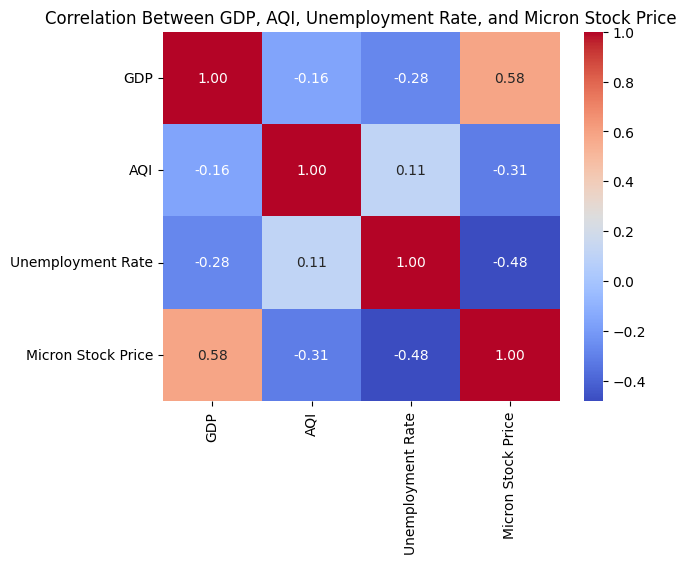

In [ ]:
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between GDP, AQI, Unemployment Rate, and Micron Stock Price')
plt.show()

In [ ]:
correlations = merged_df.corr()['GDP'][1:]  # Correlation of factors with GDP
weights = correlations.abs() / correlations.abs().sum()
print("Weights:\n", weights)

# Step 2: Apply Weights
weighted_features = merged_df[['AQI', 'Unemployment Rate', 'Micron Stock Price']].multiply(weights.values[1:])

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    weighted_features, merged_df['GDP'], test_size=0.2, random_state=42
)

# Step 4: Fit Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Weights:
 GDP                   0.494773
AQI                   0.078404
Unemployment Rate     0.137542
Micron Stock Price    0.289281
Name: GDP, dtype: float64
Model Performance:
Mean Squared Error (MSE): 47362725.80795294
R-squared (R^2): -0.46339335108768553


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a DataFrame
corr_matrix = pd.DataFrame(correlation_matrix, index=['AQI', 'Unemployment Rate', 'Micron Stock Price'])

# Extract correlations of independent variables with GDP
# corr_with_gdp = corr_matrix.loc['GDP', ['AQI', 'Unemployment Rate', 'Micron Stock Price']]
corr_with_gdp = corr_matrix.loc[:, 'GDP'][['AQI', 'Unemployment Rate', 'Micron Stock Price']]

# Step 2: Assign weights based on correlation
weights = corr_with_gdp.abs() / corr_with_gdp.abs().sum()  # Normalize absolute correlations to get weights

# Print assigned weights for interpretability
print("Assigned Weights:")
print(weights)

# Step 2: Train the linear regression model
X = merged_df[['AQI', 'Unemployment Rate', 'Micron Stock Price']]  # Features (independent variables)
y = merged_df['GDP']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")
print("\nModel Coefficients:")
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(poly.transform(X_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(poly.transform(X_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")


Assigned Weights:
AQI                   0.155185
Unemployment Rate     0.272238
Micron Stock Price    0.572577
Name: GDP, dtype: float64

Model Performance:
Mean Squared Error (MSE): 47362725.807952955
Root Mean Squared Error (RMSE): 6882.058253745965
R-squared (R^2): -0.463393351087686

Model Coefficients:
AQI                    46.031828
Unemployment Rate     208.895740
Micron Stock Price    235.895108
dtype: float64

Model Performance:
Mean Squared Error (MSE): 13949961.001909923
Root Mean Squared Error (RMSE): 3734.9646587230145
R-squared (R^2): 0.5689800401078349

Model Performance:
Mean Squared Error (MSE): 3.2879688555143005e-13
Root Mean Squared Error (RMSE): 5.734081317451211e-07
R-squared (R^2): 1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Load your merged historical data (GDP, AQI, Unemployment Rate, Stock Price)
# merged_df = pd.read_csv("your_merged_data.csv")

# Step 2: Prepare features and target
X = merged_df[['AQI', 'Unemployment Rate', 'Micron Stock Price']]  # Features (independent variables)
y = merged_df['GDP']  # Target (dependent variable)

# Apply polynomial transformation to the features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the transformed features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Forecast future AQI, unemployment rate, and stock price
def forecast_variable(data, forecast_periods):
    """Forecast a variable using Exponential Smoothing with damped trend"""
    model = ExponentialSmoothing(data, trend='add', damped_trend=True, seasonal=None)
    fit = model.fit()
    return fit.forecast(forecast_periods)

# Forecast each factor for 25 years
forecast_years = 25
last_year = merged_df['year'].max()
future_years = np.arange(last_year + 1, last_year + 1 + forecast_years)

# Forecast variables
aqi_forecast = forecast_variable(merged_df['AQI'], forecast_years)
unemployment_forecast = forecast_variable(merged_df['Unemployment Rate'], forecast_years)
stock_forecast = forecast_variable(merged_df['Micron Stock Price'], forecast_years)

# Constrain forecasts based on historical trends
historical_growth_aqi = merged_df['AQI'].pct_change().mean()
historical_growth_unemployment = merged_df['Unemployment Rate'].pct_change().mean()
historical_growth_stock = merged_df['Micron Stock Price'].pct_change().mean()

aqi_forecast = merged_df['AQI'].iloc[-1] * (1 + historical_growth_aqi) ** np.arange(1, forecast_years + 1)
unemployment_forecast = merged_df['Unemployment Rate'].iloc[-1] * (1 + historical_growth_unemployment) ** np.arange(1, forecast_years + 1)
stock_forecast = merged_df['Micron Stock Price'].iloc[-1] * (1 + historical_growth_stock) ** np.arange(1, forecast_years + 1)

# Step 4: Create future data and transform
future_data = pd.DataFrame({
    'year': future_years,
    'AQI': aqi_forecast,
    'Unemployment Rate': unemployment_forecast,
    'Micron Stock Price': stock_forecast
})

future_X_poly = poly.transform(future_data[['AQI', 'Unemployment Rate', 'Micron Stock Price']])

# Step 5: Predict GDP and adjust to 2020 baseline
future_data['predicted_gdp'] = model.predict(future_X_poly)

# Scale first prediction to match 2020 GDP
future_data['predicted_gdp'] = future_data['predicted_gdp'] / future_data['predicted_gdp'].iloc[0] * 32900.0

# Constrain GDP predictions based on historical growth
historical_gdp_growth = merged_df['GDP'].pct_change().mean()
future_data['predicted_gdp'] = np.clip(
    future_data['predicted_gdp'],
    32900.0,
    32900.0 * (1 + historical_gdp_growth) ** np.arange(1, forecast_years + 1)
)

# Step 6: Output results
print(future_data)
# Step 7: Optional: Save to CSV for further analysis
# future_data.to_csv("predicted_gdp_next_25_years.csv", index=False)


    year        AQI  Unemployment Rate  Micron Stock Price  predicted_gdp
0   2021  35.883724           6.101816           57.964284   32900.000000
1   2022  36.573448           6.503434           65.584870   34995.241078
2   2023  37.276429           6.931485           74.207337   36092.381189
3   2024  37.992922           7.387711           83.963403   37223.917875
4   2025  38.723187           7.873966           95.002103   38390.929507
5   2026  39.467489           8.392225          107.492065   39594.528265
6   2027  40.226097           8.944596          121.624086   40835.861195
7   2028  40.999286           9.533324          137.614050   42116.111307
8   2029  41.787336          10.160802          155.706220   43436.498697
9   2030  42.590534          10.829579          176.176974   44798.281716
10  2031  43.409170          11.542375          199.339026   46202.758161
11  2032  44.243541          12.302087          225.546201   47651.266520
12  2033  45.093950          13.111803

In [ ]:
boise_gdp_df = boise_gdp_df.rename(columns={'gdp': 'GDP'})

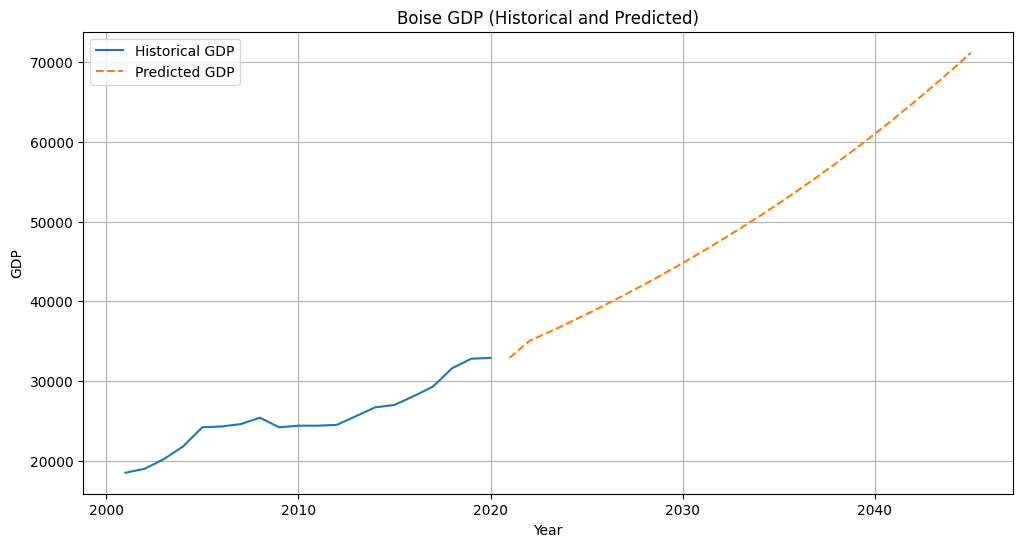

In [ ]:
# Append future_data to boise_gdp_df
future_data['year'] = future_data['year'].astype(int)
boise_gdp_df['year'] = boise_gdp_df['year'].astype(int)
appended_df = pd.concat([boise_gdp_df, future_data], ignore_index=True)

# Plot GDP
plt.figure(figsize=(12, 6))
plt.plot(appended_df['year'], appended_df['GDP'], label='Historical GDP')
plt.plot(future_data['year'], future_data['predicted_gdp'], label='Predicted GDP', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Boise GDP (Historical and Predicted)')
plt.legend()
plt.grid(True)
plt.show()